In [1]:
import os
import re

import pandas as pd
import numpy as np

from datetime import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_dir = '/Users/boyuliu/pyprojects/Joann/Joann-Thailand-Project/notebooks/datasets/new_dataset/'
raw_demand_3yrs = pd.read_csv(data_dir + 'raw_demand_3yrs.csv')
raw_demand_3yrs.head()

,province,total,week,year,industry,male,female,year_week
0,Phra Nakhon Si Ayutthaya,50,16,2017,Construction,35,15,2017-16
1,Bangkok,15,48,2017,Construction,15,0,2017-48
2,Saraburi,20,16,2017,Food and Beverage,12,8,2017-16
3,Bangkok,100,5,2017,Construction,60,40,2017-05
4,Bangkok,100,5,2017,Construction,60,40,2017-05


In [2]:
', '.join(sorted(raw_demand_3yrs.industry.unique()))

'Agriculture and Forestry, Construction, Food and Beverage, Manufacturing, Mining, Packaging, Seafood, Services, Waste Management and Recycling'

In [3]:
raw_demand_3yrs.year_week.min(), raw_demand_3yrs.year_week.max()

('2017-01', '2020-09')

In [10]:
overall_ind = raw_demand_3yrs.groupby('industry').sum()['total'].reset_index()
overall_ind = overall_ind.sort_values('total', ascending=False)

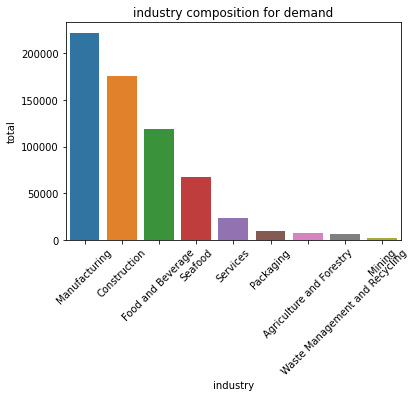

In [53]:
sns.barplot(x='industry', y='total', data=overall_ind)
plt.xticks(rotation='45')
plt.title('industry composition for demand')
plt.show()

In [22]:
dt.strptime('2017-16-1', '%Y-%W-%w').isoformat()[:7]

'2017-04'

In [24]:
raw_demand_3yrs['year_month'] = raw_demand_3yrs.year_week.apply(
                lambda x: dt.strptime(x+'-1', '%Y-%W-%w').isoformat()[:7])
by_month_ind = raw_demand_3yrs.groupby(['year_month','industry']).sum()['total'].reset_index()
# by_month_ind = by_month_ind.sort_values('total', ascending=False)
by_month_ind

,year_month,industry,total
0,2017-01,Agriculture and Forestry,35
1,2017-01,Construction,1666
2,2017-01,Food and Beverage,1119
3,2017-01,Manufacturing,2657
4,2017-01,Seafood,2794
...,...,...,...
326,2020-03,Manufacturing,2187
327,2020-03,Packaging,127
328,2020-03,Seafood,20
329,2020-03,Services,466


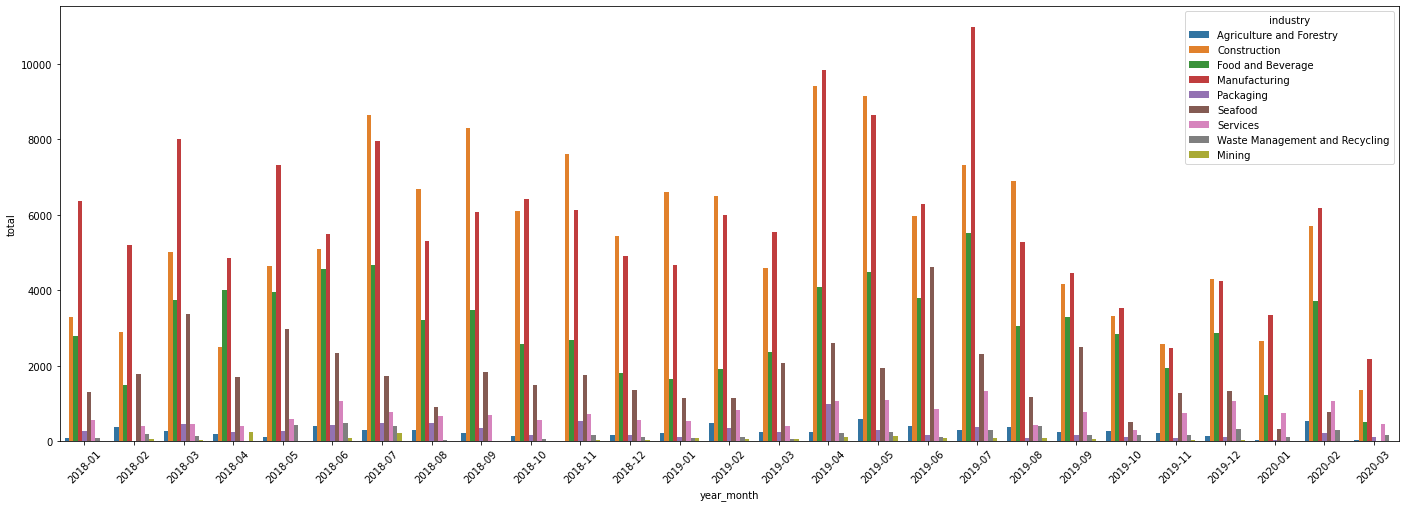

In [30]:
fig, ax = plt.subplots(1,1, figsize=(24, 8))
sns.barplot(x='year_month', y='total', hue='industry', data=by_month_ind[by_month_ind['year_month']>'2018'])
plt.xticks(rotation='45')
plt.show()

In [7]:
print(raw_demand_3yrs.province.nunique())
', '.join(sorted(raw_demand_3yrs.province.unique()))

72


'Amnat Charoen, Ang Thong, Bangkok, Bueng Kan, Buri Ram, Chachoengsao, Chainat, Chaiyaphum, Chanthaburi, Chiang Mai, Chiang Rai, Chonburi, Chumphon, Kalasin, Kamphaeng Phet, Kanchanaburi, Khon Kaen, Krabi, Lampang, Lamphun, Loei, Lopburi, Mukdahan, Nakhon Nayok, Nakhon Pathom, Nakhon Ratchasima, Nakhon Sawan, Nakhon Si Thammarat, Nan, Narathiwat, Nong Bua Lam Phu, Nong Khai, Nonthaburi, Pathum Thani, Phang Nga, Phatthalung, Phayao, Phetchabun, Phetchaburi, Phichit, Phitsanulok, Phra Nakhon Si Ayutthaya, Phrae, Phuket, Prachin Buri, Prachuap Khiri Khan, Ranong, Ratchaburi, Rayong, Roi Et, Sa Kaeo, Sakon Nakhon, Samut Prakan, Samut Sakhon, Samut Songkhram, Saraburi, Satun, Si Saket, Sing Buri, Songkhla, Sukhothai, Suphanburi, Surat Thani, Surin, Tak, Trang, Trat, Ubon Ratchathani, Udon Thani, Uthai Thani, Uttaradit, Yasothon'

In [ ]:
wv_data_file = data_dir + 'regression_data_wv_cases1_causal_ma_detrend_20210301.csv'
df = pd.read_csv(wv_data_file)
print(df.province.unique)
df.head()

In [31]:
os.listdir(data_dir)

['demand_data_back.csv',
 'regression_data_wv_cases1_causal_detrend_reverse_20210210.csv',
 'regression_data_wv_cases2_20210120.csv',
 'regression_data_wv_cases1_causal_ma_detrend_20210211.csv',
 'regression_data_wv_cases1_causal_ma_detrend_Samut Sakhon_20210301.csv',
 'regression_data_wv_cases1_causal_ma_detrend_Chachoengsao_20210301.csv',
 'regression_data_wv_cases1_detrend_20210204.csv',
 'regression_data_wv_cases1_causal_ma_detrend_Kanchanaburi_20210301.csv',
 'categories.csv',
 'regression_data_wv_cases1_causal_ma_detrend_Ranong_20210301.csv',
 'sending_data.csv',
 '2019_demand_data.csv',
 'regression_data_wv_cases1_20210301.csv',
 'regression_data_wv_cases1_causal_ma_detrend_USD_20210311.csv',
 'new_cases.csv',
 'regression_data_wv_cases1_causal_ma_detrend_Chonburi_20210301.csv',
 'regression_data_wv_cases1_USD_20210311.csv',
 'regression_data_wv_cases4_20210131.csv',
 'regression_data_wv_cases3_20210131.csv',
 'to_compare.csv',
 'regression_data_wv_cases1_causal_ma_detrend_Phuke

In [32]:
wv1 = pd.read_csv(data_dir+'wv_cases1.csv')
wv1.head()

,year_week,perc_abuse,wv_count,province
0,2018-45,0.0,1,Chiang Mai
1,2018-49,1.0,7,Chiang Mai
2,2019-05,0.0,1,Chiang Mai
3,2019-30,0.0,2,Chiang Mai
4,2019-31,0.0,2,Chiang Mai


In [41]:
suppliers = pd.read_csv(data_dir+'suppliers.csv')
wv = pd.read_csv(data_dir+'cases.csv')
wv.columns

Index(['id', 'name', 'created', 'last_modified', 'client_nickname',
       'client_phonenumber', 'client_line_account', 'client_facebook_account',
       'client_viber_account', 'client_share_info_consent',
       'issara_supply_chain', 'non_supply_chain', 'description',
       'debt_bondage', 'debt_bondage_detail', 'vot_needs', 'referral_notes',
       'next_steps', 'work_place_details', 'dead_line_date', 'final_remarks',
       'client_contract_type_id', 'client_document_type_id',
       'client_ethnicity_id', 'client_gender_id', 'client_nationality_id',
       'client_status_id', 'client_type_id', 'destination_recruiter_id',
       'issara_staff_id', 'next_steps_issara_staff_id', 'rating_dest_employer',
       'rating_dest_recruiter', 'rating_source_broker',
       'rating_source_recruiter', 'referral_action_id', 'source_recruiter_id',
       'source_upstream_broker', 'supplier_id', 'work_place_id',
       'client_time_at_job', 'country_id', 'district_id', 'province_id',
       'cli

In [37]:
suppliers.columns

Index(['Unnamed: 0', 'id', 'name', 'created', 'tier_id', 'address', 'zipcode',
       'gps', 'vessel_number', 'fishing_gear_liscense_number', 'contact_name',
       'contact_phone', 'contact_email', 'name_harvesting_business',
       'num_vessels_sourced_from', 'total_num_workers',
       'total_num_thai_workers', 'total_num_cambodian_workers',
       'total_num_myanmar_workers', 'total_num_lao_workers',
       'total_num_vietnamese_workers', 'hiring_practice', 'other',
       'country_id', 'district_id', 'industry_id', 'province_id',
       'vessel_type_id', 'total_num_men_workers', 'total_num_women_workers',
       'subindustry_id', 'golden_dreams_employer_id', 'description', 'website',
       'lat', 'lng'],
      dtype='object')

In [42]:
wv = wv.merge(suppliers[['id','industry_id']].rename(columns={'id':'supplier_id'}), on='supplier_id')
wv.head()

,id,name,created,last_modified,client_nickname,client_phonenumber,client_line_account,client_facebook_account,client_viber_account,client_share_info_consent,...,debt_bondage_detail_broker,issue_getting_better,issue_getting_better_description,issue_workers_affected,issue_workers_affected_description,case_status_id,issue_legacy_level,case_id,kpi_id,industry_id
0,41,NaN,2018-11-17,2019-03-01,NaN,NaN,NaN,NaN,NaN,Not sure; forgot to ask and need to check back...,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,11.0
1,93,NaN,2018-11-19,2019-09-08,NaN,NaN,NaN,NaN,NaN,Not sure; forgot to ask and need to check back...,...,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,11.0
2,147,NaN,2018-11-21,2019-09-08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,11.0
3,653,NaN,2018-12-18,2019-03-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,11.0
4,693,NaN,2018-12-20,2019-03-01,NaN,NaN,NaN,NaN,NaN,No,...,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,11.0


In [55]:
sum(pd.notnull(wv.industry_id)), wv.shape[0]

(4536, 13197)

In [50]:
wv_ind_count = wv.industry_id.value_counts().reset_index().rename(columns={'industry_id':'count'})
wv_ind_count = pd.merge(wv_ind_count, industries, left_on='index', right_on='id', how='left')
wv_ind_count

,index,count,id,name
0,16.0,2029,16,Seafood
1,11.0,1788,11,Manufacturing
2,21.0,559,21,Food and Beverage
3,17.0,68,17,Services
4,3.0,49,3,Construction
5,1.0,43,1,Agriculture and Forestry


In [46]:
industries = pd.read_csv(data_dir+'industries.csv')
industries

,id,name
0,1,Agriculture and Forestry
1,3,Construction
2,11,Manufacturing
3,12,Mining
4,13,Packaging
5,16,Seafood
6,17,Services
7,19,Waste Management and Recycling
8,21,Food and Beverage


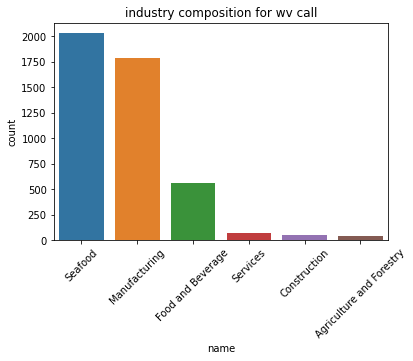

In [52]:
sns.barplot(x='name', y='count', data=wv_ind_count)
plt.xticks(rotation='45')
plt.title('industry composition for wv call')
plt.show()